In [1]:
import pandas as pd
import numpy as np

In [2]:
tpm_scaled_fp = "/Users/cheyanne/Library/Mobile Documents/com~apple~CloudDocs/github_repos/CPBS7602/assignment03/tpm_scaled.csv"

In [3]:
tpm_scaled = pd.read_csv(tpm_scaled_fp, index_col=0)

In [4]:
display(tpm_scaled)

,RP11-3J1.1,TMEM167B,RNA5SP19,RP11-388G3.1,CH17-264B6.4,BTG4P1,snoMe28S-Am2634,Y_RNA,ATXN1L,USP17L25,...,COX7A2L,MIR500B,OR4G1P,RP11-76H14.2,RP11-43D4.3,MTND2P18,snoU13.4,MIR300,DEFB126,OR8B5P
Tissue,,,,,,,,,,,,,,,,,,,,,
Adipose Tissue,-0.187192,1.878705,-0.149649,-0.330800,-0.163793,-0.033556,-0.131723,7.039768,2.275804,0.0,...,1.008925,-0.025749,-0.205672,4.390730,-0.374691,-0.138011,-0.062647,-0.069471,-0.143432,-0.129707
Muscle,-0.187192,-0.142945,-0.149649,-0.330800,-0.163793,-0.033556,-0.131723,-0.154864,-0.226124,0.0,...,-0.591819,-0.025749,-0.205672,0.155128,-0.374691,-0.138011,-0.062647,-0.069471,-0.143432,-0.129707
Blood Vessel,-0.187192,1.376769,-0.149649,2.257657,-0.163793,-0.033556,-0.131723,-0.154864,3.403667,0.0,...,0.931810,-0.025749,5.301855,2.682944,-0.374691,-0.138011,-0.062647,-0.069471,-0.143432,-0.129707
Blood Vessel,-0.187192,0.627176,-0.149649,-0.330800,-0.163793,-0.033556,-0.131723,-0.154864,0.605634,0.0,...,0.630656,-0.025749,-0.205672,-0.598637,1.619849,-0.138011,-0.062647,-0.069471,-0.143432,-0.129707
Heart,1.718123,-0.779966,-0.149649,-0.330800,-0.163793,-0.033556,-0.131723,-0.154864,-0.923359,0.0,...,-0.883232,-0.025749,-0.205672,-0.598637,-0.374691,-0.138011,-0.062647,-0.069471,-0.143432,-0.129707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thyroid,-0.187192,-0.021765,-0.149649,-0.330800,-0.163793,-0.033556,3.320268,-0.154864,0.300656,0.0,...,-0.415672,-0.025749,-0.205672,-0.598637,-0.374691,-0.138011,-0.062647,-0.069471,-0.143432,-0.129707
Esophagus,-0.187192,0.182850,-0.149649,-0.330800,-0.163793,-0.033556,-0.131723,-0.154864,0.988243,0.0,...,-0.659193,-0.025749,-0.205672,0.576105,0.457955,-0.138011,-0.062647,-0.069471,-0.143432,-0.129707
Blood Vessel,-0.187192,0.739085,-0.149649,-0.330800,-0.163793,-0.033556,-0.131723,-0.154864,1.278803,0.0,...,0.404993,-0.025749,-0.205672,2.297047,0.651474,-0.138011,-0.062647,-0.069471,-0.143432,-0.129707


#### Continuing the analysis only using the scaled data given the clustering results from prior analysis. Only the UMAP with the PCA and spectral analysis will be used. The MSDS was too computationally intensive for the scope of the assignment.


Latent spaces to replicate with models:
First, PCA with Spectral Analysis and UMAP in 3d

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.cluster import SpectralClustering

/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


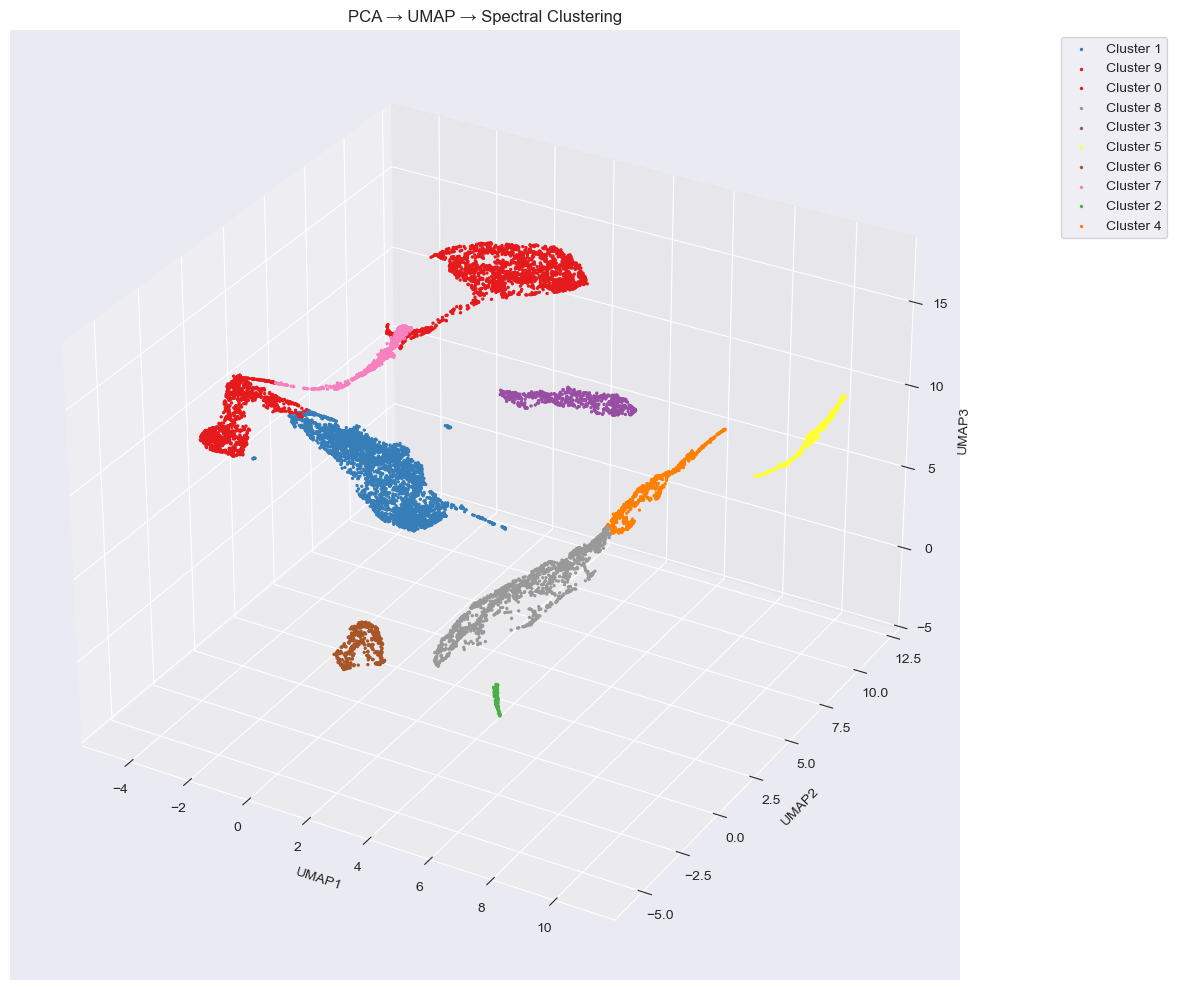

In [6]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=7, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 3D using UMAP
umap3_model = umap.UMAP(n_components=3, n_neighbors=10, min_dist=0.1, random_state=42)
umap3_data = umap3_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=10, affinity='rbf', gamma=0.1, random_state=42)
cluster_labels = spectral.fit_predict(umap3_data)

# Step 3: Create a DataFrame for plotting
umap3_df = pd.DataFrame(umap3_data, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap3_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 5: Plot Spectral Clustering Results with distinct colors
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Use Seaborn's 'Set1' or 'bright' palette for high contrast
palette = sns.color_palette('Set1', n_colors=umap3_df['Cluster'].nunique())

# Plot each cluster
for label in umap3_df['Cluster'].unique():
    subset = umap3_df[umap3_df['Cluster'] == label]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'],
               color=palette[label], label=f'Cluster {label}', s=2, alpha=1)  # Adjust point size and opacity

# Add labels and titles
ax.set_title('PCA → UMAP → Spectral Clustering')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()


PCA with Spectral Analysis and UMAP in 2d


/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


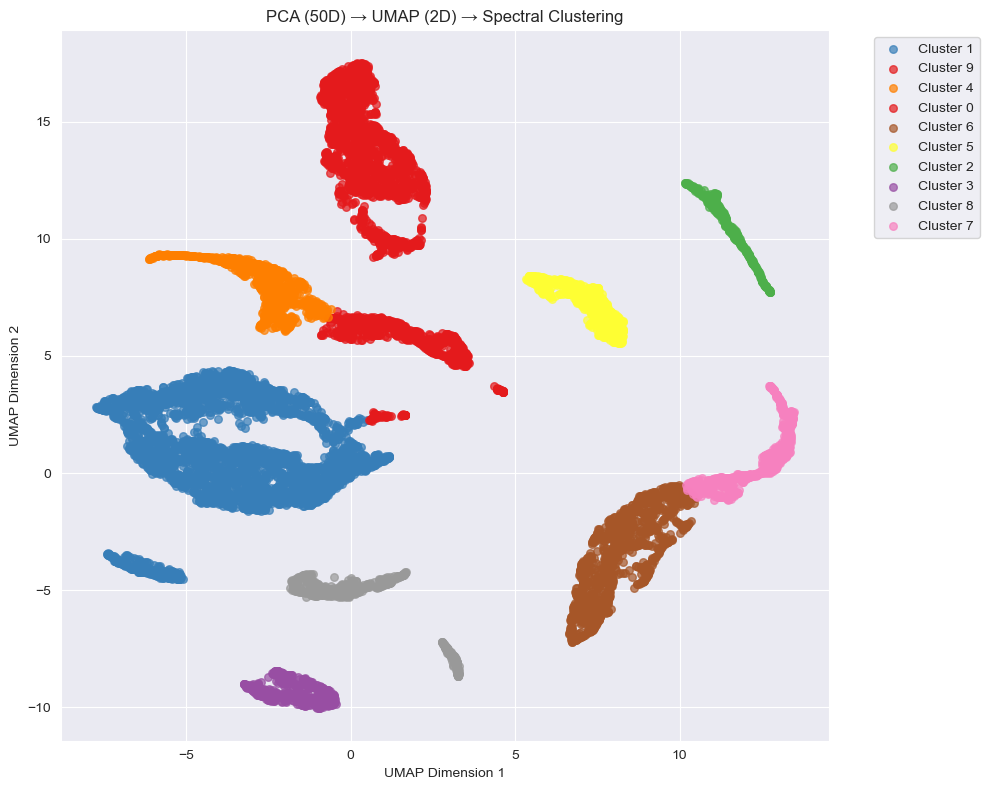

In [7]:
# Step 1: Reduce data with PCA
pca = PCA(n_components=7, random_state=42)
pca_data = pca.fit_transform(tpm_scaled)

# Step 2: Reduce PCA data to 2D using UMAP
umap2_model = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42)
umap2_data = umap2_model.fit_transform(pca_data)

# Step 3: Spectral Clustering on UMAP-reduced data
spectral = SpectralClustering(n_clusters=10, affinity='rbf', gamma=0.1, random_state=42)
cluster_labels = spectral.fit_predict(umap2_data)

# Step 3: Create a DataFrame for plotting
umap2_df = pd.DataFrame(umap2_data, columns=['UMAP1', 'UMAP2'])
umap2_df['Cluster'] = cluster_labels  # Add cluster labels from Spectral Clustering

# Step 4: Plot the 2D UMAP visualization
plt.figure(figsize=(10, 8))

# Define a diverse color palette for the clusters
palette = sns.color_palette('Set1', n_colors=len(umap2_df['Cluster'].unique()))

# Plot each cluster
for label in umap2_df['Cluster'].unique():
    subset = umap2_df[umap2_df['Cluster'] == label]
    plt.scatter(subset['UMAP1'], subset['UMAP2'], color=palette[label],
                label=f'Cluster {label}', s=30, alpha=0.7)  # Adjust size and transparency

# Add labels and title
plt.title('PCA (50D) → UMAP (2D) → Spectral Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [9]:
tissue_labels = tpm_scaled.index
print(tissue_labels)

Index(['Adipose Tissue', 'Muscle', 'Blood Vessel', 'Blood Vessel', 'Heart',
       'Adipose Tissue', 'Skin', 'Brain', 'Thyroid', 'Esophagus',
       ...
       'Adipose Tissue', 'Skin', 'Heart', 'Blood Vessel', 'Heart', 'Thyroid',
       'Esophagus', 'Blood Vessel', 'Muscle', 'Adipose Tissue'],
      dtype='object', name='Tissue', length=12462)


In [10]:
umap3_df = pd.DataFrame(umap3_data, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap3_df['Tissue'] = tissue_labels
display(umap3_df)

,UMAP1,UMAP2,UMAP3,Tissue
0,-1.244323,6.201374,2.859681,Adipose Tissue
1,-3.982232,-0.801024,10.199581,Muscle
2,-0.948698,5.916493,2.705319,Blood Vessel
3,-0.802581,5.488636,1.942061,Blood Vessel
4,-3.222689,0.888006,10.917901,Heart
...,...,...,...,...
12457,0.653429,11.121228,5.374468,Thyroid
12458,-0.868744,2.456550,5.947646,Esophagus
12459,-0.392737,2.766480,3.511460,Blood Vessel
12460,-3.815824,-1.988101,10.673391,Muscle


In [11]:
umap2_df = pd.DataFrame(umap2_data, columns=['UMAP1', 'UMAP2'])
umap2_df['Tissue'] = tissue_labels
display(umap2_df)

,UMAP1,UMAP2,Tissue
0,-0.950565,2.404740,Adipose Tissue
1,-0.304636,6.490026,Muscle
2,-0.778869,1.845492,Blood Vessel
3,-0.186089,0.556760,Blood Vessel
4,-2.375582,6.711559,Heart
...,...,...,...
12457,6.770709,8.101522,Thyroid
12458,-5.068172,-0.413052,Esophagus
12459,-2.598371,-1.551081,Blood Vessel
12460,0.896656,6.268530,Muscle


In [12]:
# label encoding for tissues
le = LabelEncoder()
umap3_df['Tissue_Encoded'] = le.fit_transform(umap3_df['Tissue'])
umap2_df['Tissue_Encoded'] = le.fit_transform(umap2_df['Tissue'])

get test and training data sets

In [13]:
X_3d = umap3_df[['UMAP1', 'UMAP2', 'UMAP3']]
y_3d = umap3_df['Tissue_Encoded']

X_2d = umap2_df[['UMAP1', 'UMAP2']]
y_2d = umap2_df['Tissue_Encoded']

# Split with stratification so we don't overtrain on any specific tissue type
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(
    X_3d, y_3d, test_size=0.2, random_state=42, stratify=y_3d
)

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.2, random_state=42, stratify=y_2d
)


# 3d Ensemble Results

### Prone to overfitting model: Random Forest

In [30]:
rf_params = {'n_estimators': [100, 200],
             'max_depth': [10, 20, None],
             'min_samples_split': [2, 5],
             'random_state': [42]}

rf = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5, verbose=1)
rf.fit(X_train_3d, y_train_3d)

print("Best Random Forest Parameters:", rf.best_params_)
rf_pred_3d = rf.predict(X_test_3d)
print("Random Forest Classification Report (3D):\n", classification_report(y_test_3d, rf_pred_3d))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42}
Random Forest Classification Report (3D):
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       241
           1       0.99      0.99      0.99       186
           2       0.92      0.90      0.91       267
           3       1.00      1.00      1.00       528
           4       0.78      0.66      0.72       156
           5       0.70      0.69      0.69       289
           6       0.89      0.95      0.92       172
           7       0.98      0.96      0.97       161
           8       0.90      0.93      0.91       362
           9       0.99      0.98      0.99       131

    accuracy                           0.91      2493
   macro avg       0.91      0.90      0.90      2493
weighted avg       0.91      0.91      0.91      2493



### Weaker Learning Model: Bagging with Decision Tree

In [25]:
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=50, random_state=42)
bagging.fit(X_train_3d, y_train_3d)

bagging_pred_3d = bagging.predict(X_test_3d)
print("Bagging Classification Report (3D):\n", classification_report(y_test_3d, bagging_pred))

Bagging Classification Report (3D):
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       241
           1       0.71      0.96      0.82       186
           2       0.00      0.00      0.00       267
           3       1.00      1.00      1.00       528
           4       0.00      0.00      0.00       156
           5       0.00      0.00      0.00       289
           6       0.00      0.00      0.00       172
           7       0.45      0.97      0.62       161
           8       0.30      0.82      0.44       362
           9       0.98      0.98      0.98       131

    accuracy                           0.60      2493
   macro avg       0.43      0.56      0.47      2493
weighted avg       0.47      0.60      0.51      2493



/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

# 2d Ensemble Results

### Prone to overfitting model: Random Forest

In [26]:
# use same params as above for accurate comparison
rf.fit(X_train_2d, y_train_2d)
rf_pred_2d = rf.predict(X_test_2d)
print("Random Forest Classification Report (2D):\n", classification_report(y_test_2d, rf_pred_2d))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest Classification Report (2D):
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       241
           1       1.00      0.99      0.99       186
           2       0.92      0.90      0.91       267
           3       1.00      1.00      1.00       528
           4       0.72      0.60      0.65       156
           5       0.67      0.67      0.67       289
           6       0.90      0.96      0.93       172
           7       0.98      0.98      0.98       161
           8       0.91      0.94      0.92       362
           9       0.98      0.98      0.98       131

    accuracy                           0.91      2493
   macro avg       0.90      0.90      0.90      2493
weighted avg       0.90      0.91      0.90      2493



### Weaker Learning Model: Bagging with Decision Tree

In [27]:
# again, using same params as above
bagging.fit(X_train_2d, y_train_2d)
bagging_pred_2d = bagging.predict(X_test_2d)
print("Bagging Classification Report (2D):\n", classification_report(y_test_2d, bagging_pred_2d))


Bagging Classification Report (2D):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       241
           1       0.65      0.99      0.79       186
           2       0.21      1.00      0.35       267
           3       1.00      1.00      1.00       528
           4       0.00      0.00      0.00       156
           5       0.54      0.08      0.13       289
           6       0.00      0.00      0.00       172
           7       0.00      0.00      0.00       161
           8       0.85      0.66      0.74       362
           9       1.00      0.75      0.86       131

    accuracy                           0.54      2493
   macro avg       0.43      0.45      0.39      2493
weighted avg       0.52      0.54      0.48      2493



/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### Evaluate with heatmaps


/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cheyanne/miniconda3/envs/cpbs7602/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

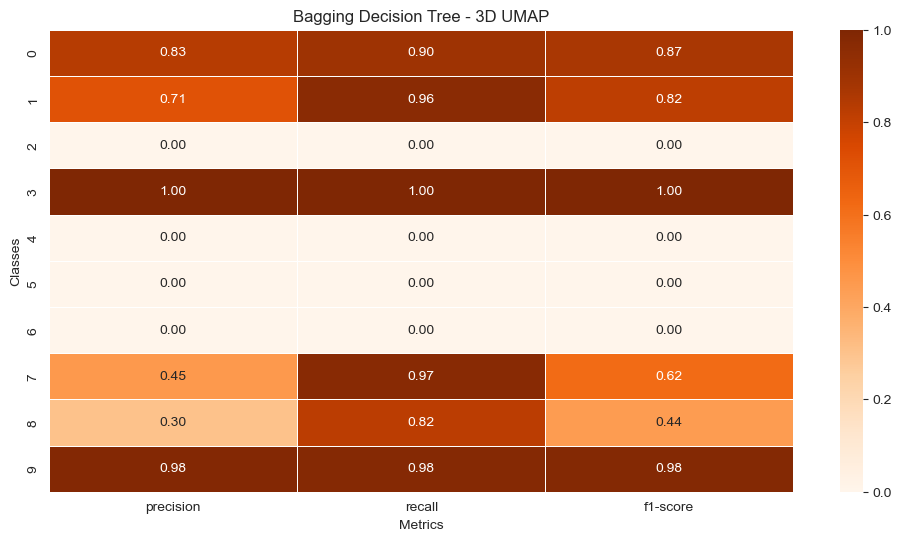

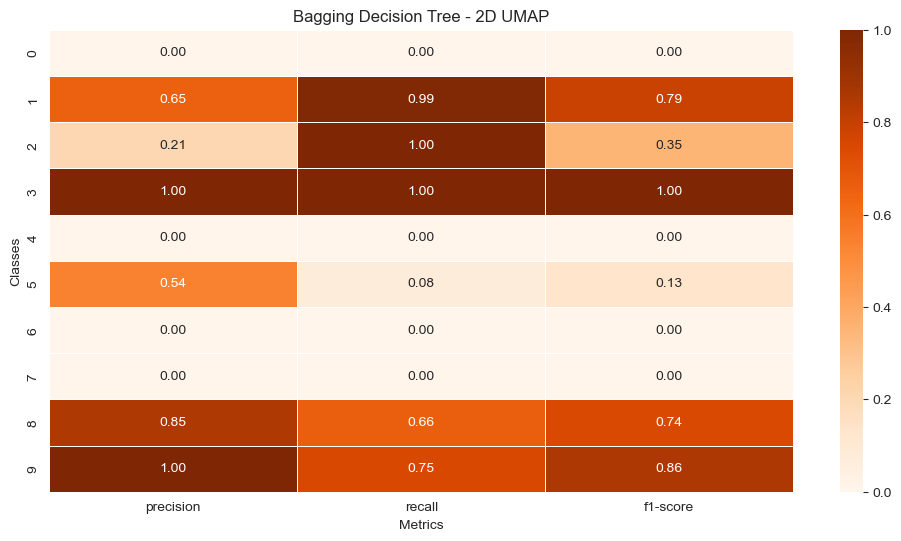

In [28]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification reports
report_3d_bagging = classification_report(y_test_3d, bagging_pred_3d, output_dict=True)
report_2d_bagging = classification_report(y_test_2d, bagging_pred_2d, output_dict=True)

# Convert reports to DataFrames
report_df_3d_bagging = pd.DataFrame(report_3d_bagging).transpose()
report_df_2d_bagging = pd.DataFrame(report_2d_bagging).transpose()

# Heatmap for 3D UMAP
plt.figure(figsize=(12, 6))
sns.heatmap(report_df_3d_bagging.iloc[:-3, :-1], annot=True, cmap='Oranges', fmt=".2f", linewidths=0.5)
plt.title('Bagging Decision Tree - 3D UMAP')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

# Heatmap for 2D UMAP
plt.figure(figsize=(12, 6))
sns.heatmap(report_df_2d_bagging.iloc[:-3, :-1], annot=True, cmap='Oranges', fmt=".2f", linewidths=0.5)
plt.title('Bagging Decision Tree - 2D UMAP')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()


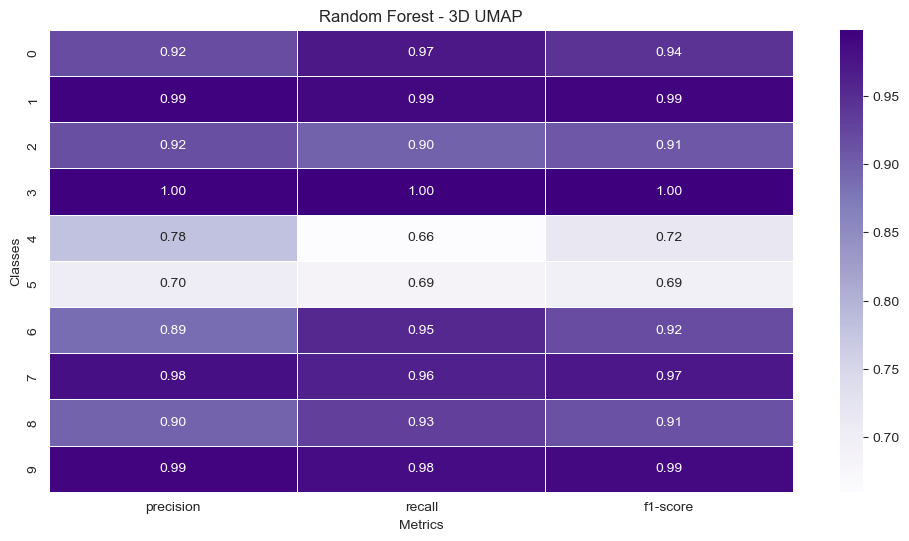

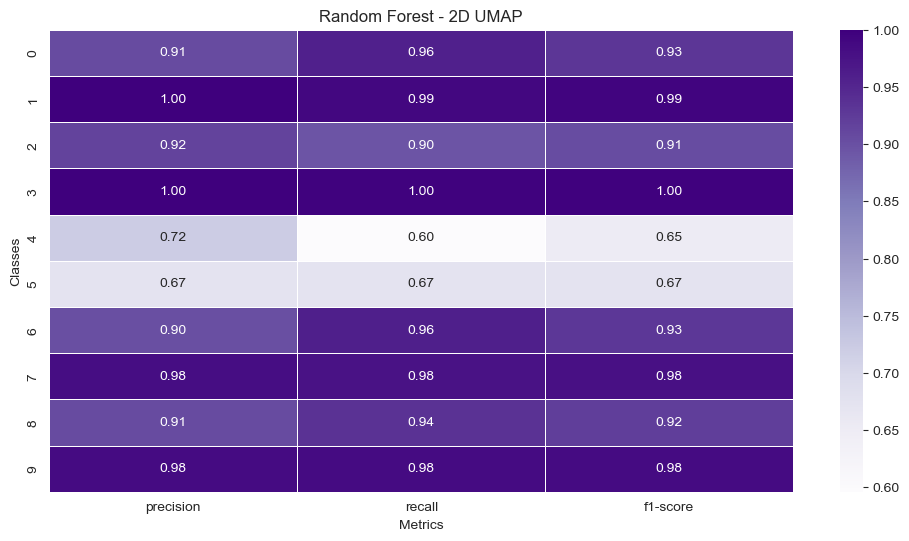

In [31]:
# Generate classification reports
report_3d_rf = classification_report(y_test_3d, rf_pred_3d, output_dict=True)
report_2d_rf = classification_report(y_test_2d, rf_pred_2d, output_dict=True)

# Convert reports to DataFrames
report_df_3d_rf = pd.DataFrame(report_3d_rf).transpose()
report_df_2d_rf = pd.DataFrame(report_2d_rf).transpose()

# Heatmap for 3D UMAP
plt.figure(figsize=(12, 6))
sns.heatmap(report_df_3d_rf.iloc[:-3, :-1], annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
plt.title('Random Forest - 3D UMAP')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

# Heatmap for 2D UMAP
plt.figure(figsize=(12, 6))
sns.heatmap(report_df_2d_rf.iloc[:-3, :-1], annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
plt.title('Random Forest - 2D UMAP')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()
